In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [7]:
cora = pd.concat([
    pd.DataFrame({
        'adapt': [0.329, 0.321, 0.409, 0.637, 0.743, 0.802, 0.84, 0.846, 0.865, 0.868, 0.877, 0.871, 0.88, 0.88, 0.867, 0.874, 0.874, 0.87]
    }),
    pd.DataFrame({
        'batch': [0.319, 0.319, 0.326, 0.396, 0.523, 0.655, 0.749, 0.788, 0.811, 0.832, 0.848, 0.857, 0.867, 0.872, 0.872, 0.873, 0.874, 0.873, 0.871, 0.875, 0.871, 0.868, 0.87, 0.87, 0.873, 0.873, 0.871, 0.875, 0.871, 0.87, 0.869, 0.871, 0.873, 0.87, 0.871, 0.87, 0.87, 0.875, 0.869, 0.873]
    }),
    pd.DataFrame({
        'shadow': [0.319, 0.32, 0.327, 0.402, 0.524, 0.653, 0.747, 0.782, 0.811, 0.827, 0.842, 0.857, 0.867, 0.87, 0.874, 0.875, 0.877, 0.875, 0.875, 0.872, 0.873, 0.871, 0.873, 0.869, 0.869, 0.87, 0.872, 0.87, 0.87, 0.871, 0.871, 0.871, 0.871, 0.869, 0.871, 0.87, 0.87, 0.873, 0.873, 0.872]
    }),
    pd.DataFrame({
         'cluster': [0.319, 0.319, 0.319, 0.319, 0.322, 0.409, 0.514, 0.67, 0.705, 0.74, 0.758, 0.79, 0.799, 0.815, 0.841, 0.842, 0.847, 0.858, 0.86, 0.867, 0.867, 0.871, 0.869, 0.872, 0.872, 0.867, 0.868, 0.866, 0.866, 0.866, 0.866, 0.866, 0.864, 0.865, 0.864, 0.866, 0.865, 0.865, 0.865, 0.862]
    })
], axis=1)
cora.index += 1

citeseer = pd.concat([
    pd.DataFrame({
        'adapt': [0.573, 0.751, 0.77, 0.784, 0.792, 0.8, 0.803, 0.8, 0.802, 0.8, 0.796, 0.797, 0.796, 0.791, 0.8, 0.798, 0.79, 0.791, 0.791, 0.793]
    }),
    pd.DataFrame({
        'batch': [0.559, 0.52, 0.687, 0.745, 0.766, 0.767, 0.771, 0.775, 0.777, 0.776, 0.785, 0.792, 0.787, 0.791, 0.796, 0.793, 0.79, 0.794, 0.786, 0.785, 0.787, 0.782, 0.78, 0.782, 0.779, 0.778, 0.779, 0.774, 0.782, 0.778, 0.778, 0.78, 0.777, 0.775, 0.775, 0.774, 0.77, 0.77, 0.77, 0.772]
    }),
    pd.DataFrame({
        'shadow': [0.51, 0.516, 0.684, 0.748, 0.77, 0.768, 0.77, 0.777, 0.772, 0.777, 0.782, 0.789, 0.789, 0.79, 0.79, 0.795, 0.791, 0.79, 0.787, 0.787, 0.784, 0.782, 0.783, 0.778, 0.779, 0.777, 0.777, 0.777, 0.772, 0.778, 0.775, 0.774, 0.771, 0.767, 0.771, 0.776, 0.771, 0.767, 0.77, 0.768]
    }),
    pd.DataFrame({
         'cluster': [0.328, 0.267, 0.454, 0.6, 0.679, 0.717, 0.739, 0.762, 0.751, 0.763, 0.768, 0.768, 0.768, 0.777, 0.776, 0.775, 0.785, 0.793, 0.79, 0.794, 0.792, 0.794, 0.79, 0.79, 0.79, 0.792, 0.792, 0.793, 0.79, 0.79, 0.792, 0.791, 0.79, 0.786, 0.787, 0.788, 0.788, 0.783, 0.783, 0.785]
    })
], axis=1)
citeseer.index += 1

In [35]:
cora = pd.DataFrame({
    'Epoch': list(range(1, 41)) * 4,
    'sampler': ['adapt']*40 + ['batch']*40 + ['shadow']*40 + ['cluster']*40,
    'Test Accuracy': [0.329, 0.321, 0.409, 0.637, 0.743, 0.802, 0.84, 0.846, 0.865, 0.868, 0.877, 0.871, 0.88, 0.88, 0.867, 0.874, 0.874, 0.87] + [float('NaN')] * 22
        + [0.319, 0.319, 0.326, 0.396, 0.523, 0.655, 0.749, 0.788, 0.811, 0.832, 0.848, 0.857, 0.867, 0.872, 0.872, 0.873, 0.874, 0.873, 0.871, 0.875, 0.871, 0.868, 0.87, 0.87, 0.873, 0.873, 0.871, 0.875, 0.871, 0.87, 0.869, 0.871, 0.873, 0.87, 0.871, 0.87, 0.87, 0.875, 0.869, 0.873]
        + [0.319, 0.32, 0.327, 0.402, 0.524, 0.653, 0.747, 0.782, 0.811, 0.827, 0.842, 0.857, 0.867, 0.87, 0.874, 0.875, 0.877, 0.875, 0.875, 0.872, 0.873, 0.871, 0.873, 0.869, 0.869, 0.87, 0.872, 0.87, 0.87, 0.871, 0.871, 0.871, 0.871, 0.869, 0.871, 0.87, 0.87, 0.873, 0.873, 0.872]
        + [0.319, 0.319, 0.319, 0.319, 0.322, 0.409, 0.514, 0.67, 0.705, 0.74, 0.758, 0.79, 0.799, 0.815, 0.841, 0.842, 0.847, 0.858, 0.86, 0.867, 0.867, 0.871, 0.869, 0.872, 0.872, 0.867, 0.868, 0.866, 0.866, 0.866, 0.866, 0.866, 0.864, 0.865, 0.864, 0.866, 0.865, 0.865, 0.865, 0.862]
})

citeseer = pd.DataFrame({
    'Epoch': list(range(1, 41)) * 4,
    'sampler': ['adapt']*40 + ['batch']*40 + ['shadow']*40 + ['cluster']*40,
    'Test Accuracy': [0.573, 0.751, 0.77, 0.784, 0.792, 0.8, 0.803, 0.8, 0.802, 0.8, 0.796, 0.797, 0.796, 0.791, 0.8, 0.798, 0.79, 0.791, 0.791, 0.793] + [float('NaN')] * 20
        + [0.559, 0.52, 0.687, 0.745, 0.766, 0.767, 0.771, 0.775, 0.777, 0.776, 0.785, 0.792, 0.787, 0.791, 0.796, 0.793, 0.79, 0.794, 0.786, 0.785, 0.787, 0.782, 0.78, 0.782, 0.779, 0.778, 0.779, 0.774, 0.782, 0.778, 0.778, 0.78, 0.777, 0.775, 0.775, 0.774, 0.77, 0.77, 0.77, 0.772]
        + [0.51, 0.516, 0.684, 0.748, 0.77, 0.768, 0.77, 0.777, 0.772, 0.777, 0.782, 0.789, 0.789, 0.79, 0.79, 0.795, 0.791, 0.79, 0.787, 0.787, 0.784, 0.782, 0.783, 0.778, 0.779, 0.777, 0.777, 0.777, 0.772, 0.778, 0.775, 0.774, 0.771, 0.767, 0.771, 0.776, 0.771, 0.767, 0.77, 0.768]
        + [0.328, 0.267, 0.454, 0.6, 0.679, 0.717, 0.739, 0.762, 0.751, 0.763, 0.768, 0.768, 0.768, 0.777, 0.776, 0.775, 0.785, 0.793, 0.79, 0.794, 0.792, 0.794, 0.79, 0.79, 0.79, 0.792, 0.792, 0.793, 0.79, 0.79, 0.792, 0.791, 0.79, 0.786, 0.787, 0.788, 0.788, 0.783, 0.783, 0.785]
})

<AxesSubplot:xlabel='Epoch', ylabel='Test Accuracy'>

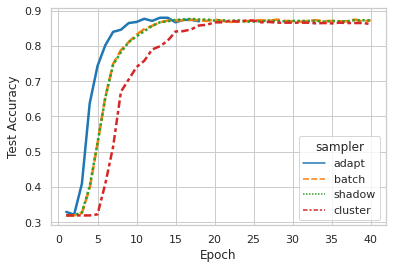

In [36]:
sns.lineplot(x='Epoch', y='Test Accuracy', hue='sampler', style="sampler", data=cora, palette="tab10", linewidth=2.5)

<AxesSubplot:xlabel='Epoch', ylabel='Test Accuracy'>

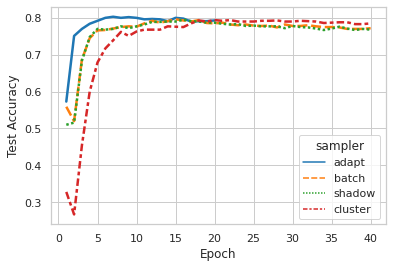

In [37]:
sns.lineplot(x='Epoch', y='Test Accuracy', hue='sampler', style="sampler", data=citeseer, palette="tab10", linewidth=2.5)

In [96]:
wisconsin = pd.DataFrame({
    'alpha': np.arange(0.1, 1.1, 0.1),
    'Test Accuracy': [0.5216, 0.5765, 0.5882, 0.5804, 0.5882, 0.6000, 0.6078, 0.6431, 0.6745, 0.7529],
    'sd': [0.0549, 0.0266, 0.0372, 0.0200, 0.0215, 0.0096, 0.0464, 0.0229, 0.0342, 0.0293],
    'baseline': [0.5842] * 10
})
cora_alpha = pd.DataFrame({
    'alpha': np.arange(0.1, 1., 0.1),
    'Test Accuracy': [0.8740, 0.8746, 0.8740, 0.8730, 0.8710, 0.8698, 0.8646, 0.8716, 0.8716],
    'sd': [0.0028, 0.0049, 0.0037, 0.0028, 0.0024, 0.0035, 0.0031, 0.0041, 0.0029],
    'baseline': [0.8652] * 9
})

# sns.relplot(x="alpha", y="Test Accuracy", kind="line", data=wisconsin);

In [112]:
def plot_error_band(data, model, lower, upper):
    _, ax = plt.subplots() 
    plt.plot(data['alpha'], data['baseline'], 'r--', label=model)
    plt.plot(data['alpha'], data['Test Accuracy'], 'b-', label='with adapt')
    plt.fill_between(data['alpha'], data['Test Accuracy'] - data['sd'], data['Test Accuracy'] + data['sd'], color='b', alpha=0.2)
    ax.set_xlabel('alpha')
    ax.set_ylabel('Test Accuracy')
    plt.ylim(lower, upper)
    plt.legend()
    plt.show()

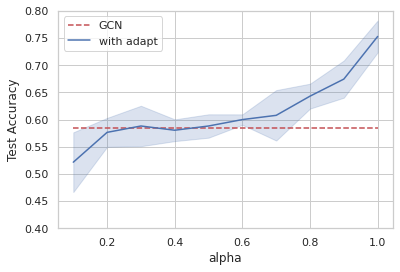

In [113]:
plot_error_band(wisconsin, 'GCN', 0.4, 0.8)

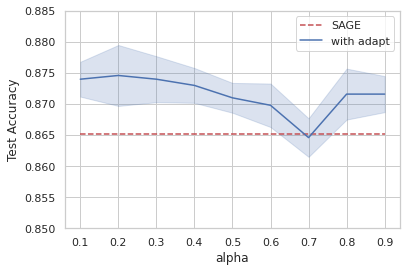

In [114]:
plot_error_band(cora_alpha, 'SAGE', 0.85, 0.885)

<AxesSubplot:xlabel='Epoch', ylabel='Mean Hop'>

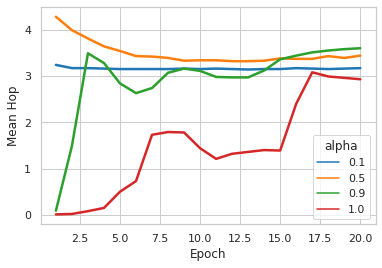

In [152]:
cora_hop = pd.DataFrame({
    'Epoch': list(range(1, 21)) * 4,
    'alpha': [0.1]*20 + [0.5]*20 + [0.9]*20 + [1.0]*20,
    'Mean Hop': [3.24, 3.17, 3.17, 3.16, 3.15, 3.15, 3.15, 3.15, 3.16, 3.15, 3.16, 3.15, 3.14, 3.15, 3.15, 3.17, 3.16, 3.15, 3.16, 3.17]
        + [4.28, 3.99, 3.81, 3.64, 3.54, 3.43, 3.42, 3.39, 3.33, 3.34, 3.34, 3.32, 3.32, 3.33, 3.38, 3.37, 3.37, 3.43, 3.39, 3.44]
        + [0.09, 1.49, 3.49, 3.28, 2.84, 2.63, 2.74, 3.07, 3.16, 3.11, 2.98, 2.97, 2.97, 3.12, 3.36, 3.44, 3.51, 3.55, 3.58, 3.6]
        + [0.01, 0.02, 0.08, 0.15, 0.5, 0.73, 1.73, 1.79, 1.78, 1.44, 1.21, 1.32, 1.36, 1.4, 1.39, 2.4, 3.08, 2.99, 2.96, 2.93]
})

sns.lineplot(x='Epoch', y='Mean Hop', hue='alpha', data=cora_hop, palette="tab10", linewidth=2.5)

In [4]:
epochs = 20
max_hop = 10

# alpha = 1
nodes_a_1 = np.array([[6104, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6104, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6104, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6104, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6104, 1683, 2135, 2477, 2088, 549, 0, 0, 0, 0], [6104, 4340, 7195, 6822, 1170, 616, 0, 0, 0, 0], [6104, 10419, 19259, 19104, 13361, 5538, 1315, 0, 0, 0], [6104, 14733, 26101, 26210, 13627, 3727, 0, 0, 0, 0], [6104, 16872, 30859, 29180, 12284, 0, 0, 0, 0, 0], [6104, 18871, 28116, 20731, 4529, 735, 0, 0, 0, 0], [6104, 17912, 26516, 14101, 748, 0, 0, 0, 0, 0], [6104, 20020, 25494, 16183, 1843, 0, 0, 0, 0, 0], [6104, 19842, 26612, 14255, 2500, 0, 0, 0, 0, 0], [6104, 22875, 29035, 17129, 3716, 0, 0, 0, 0, 0], [6104, 22686, 32009, 19376, 2422, 0, 0, 0, 0, 0], [6104, 26554, 43670, 34034, 12434, 2443, 0, 0, 0, 0], [6104, 30181, 54491, 39486, 15021, 1951, 350, 0, 0, 0], [6104, 31756, 56437, 34582, 12272, 1012, 0, 0, 0, 0], [6104, 33461, 57802, 36637, 9898, 954, 0, 0, 0, 0], [6104, 32445, 61118, 34374, 9009, 363, 0, 0, 0, 0]])

# alpha = 0.5
nodes_a_0_5 = np.array([[6104, 26960, 53366, 49864, 26097, 10178, 4338, 240, 0, 0], [6104, 29173, 60568, 47087, 17827, 5663, 831, 0, 0, 0], [6104, 32186, 64187, 42122, 15099, 3555, 352, 0, 0, 0], [6104, 35342, 60110, 42111, 10659, 2329, 567, 0, 0, 0], [6104, 36259, 62772, 35788, 9425, 1769, 0, 0, 0, 0], [6104, 37386, 66060, 33002, 8824, 639, 0, 0, 0, 0], [6104, 37382, 65715, 34186, 6543, 985, 292, 0, 0, 0], [6104, 37991, 66398, 33362, 6656, 344, 0, 0, 0, 0], [6104, 38797, 66989, 29345, 5427, 280, 0, 0, 0, 0], [6104, 38429, 67554, 29849, 5606, 437, 0, 0, 0, 0], [6104, 39322, 68022, 31703, 5125, 464, 0, 0, 0, 0], [6104, 39298, 67482, 30584, 4746, 0, 0, 0, 0, 0], [6104, 40070, 67770, 28919, 4902, 334, 0, 0, 0, 0], [6104, 40819, 68766, 28641, 5502, 508, 0, 0, 0, 0], [6104, 41924, 67616, 32560, 6312, 323, 0, 0, 0, 0], [6104, 42192, 69462, 32119, 5712, 356, 0, 0, 0, 0], [6104, 42744, 66155, 33692, 6393, 209, 0, 0, 0, 0], [6104, 43216, 66941, 31876, 7007, 0, 0, 0, 0, 0], [6104, 43104, 66553, 33779, 7579, 610, 0, 0, 0, 0], [6104, 43089, 67152, 33287, 7800, 284, 0, 0, 0, 0]])


def plot_nodes(nodes):
    nodes = nodes[:epochs, :]
    # nodes = nodes / nodes.sum(axis=-1).reshape(-1, 1)
    for i in range(1, max_hop):
        nodes[:, i] += nodes[:, i-1]
    nodes = (nodes / 1208).round()

    colors = sns.color_palette("hls", 10)
    for i in range(max_hop-1, -1, -1):
        ep = np.arange(0, epochs, 1)
        data = pd.DataFrame({
            'Epoch': ep + 1,
            'Ratio': nodes[ep, i]
        })
        sns.barplot(x="Epoch", y="Ratio", data=data, color=colors[i])

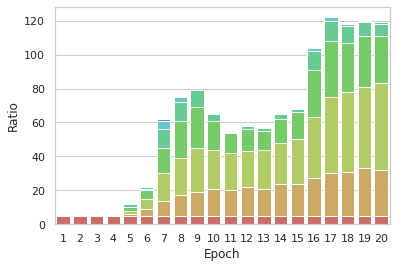

In [5]:
plot_nodes(nodes_a_1)

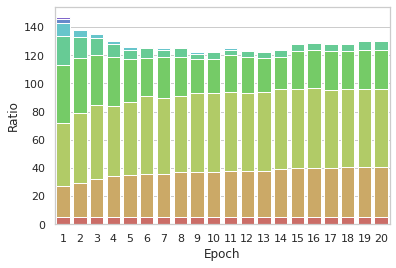

In [6]:
plot_nodes(nodes_a_0_5)